In [1]:
#name: Country Clustering
#type: Clustering
#aim: to cluster into appropriate number of groups using K-Means clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


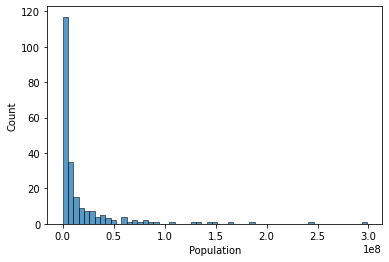

In [5]:
sns.histplot(data=df[df['Population']<500000000],x='Population');

(0.0, 140000000.0)

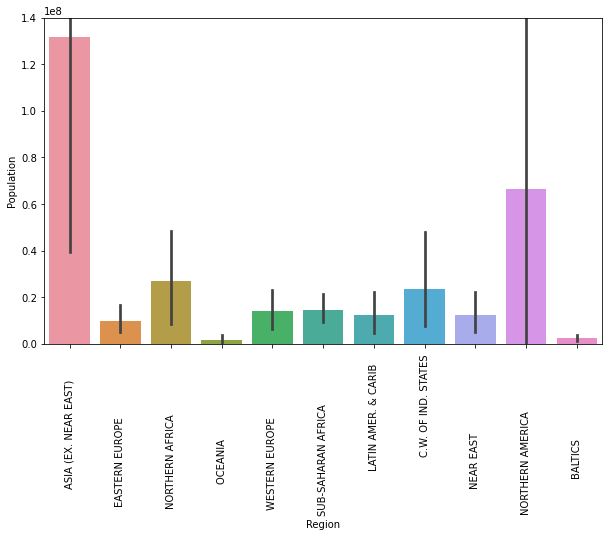

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='Population',x='Region',estimator=np.mean)
plt.xticks(rotation=90);
plt.ylim(0,1.4e8)

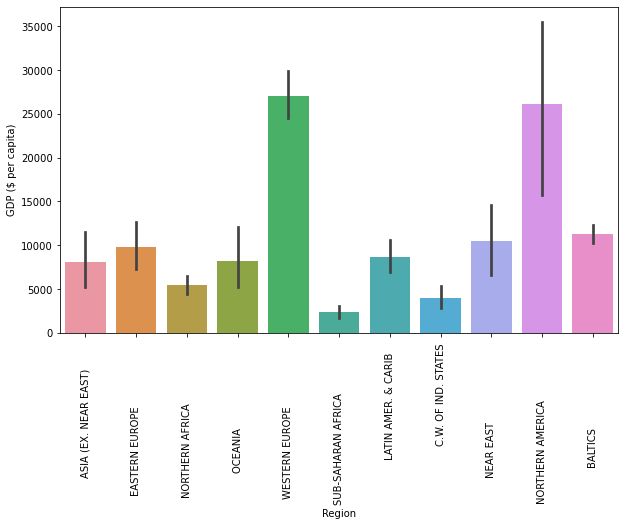

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

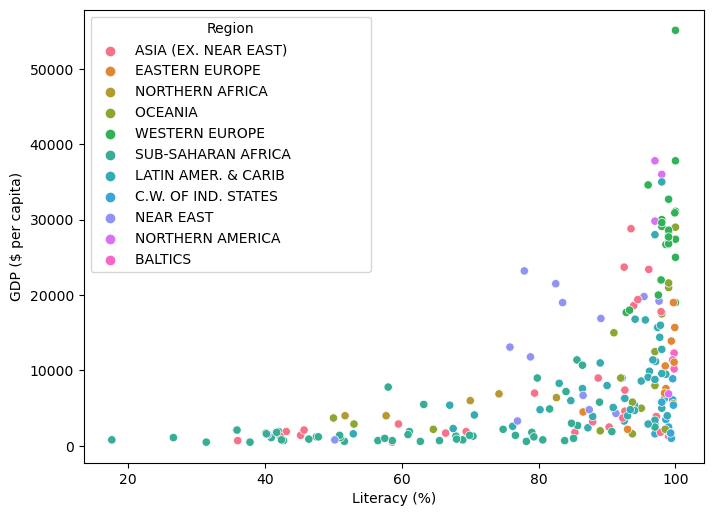

In [8]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Literacy (%)',hue='Region');

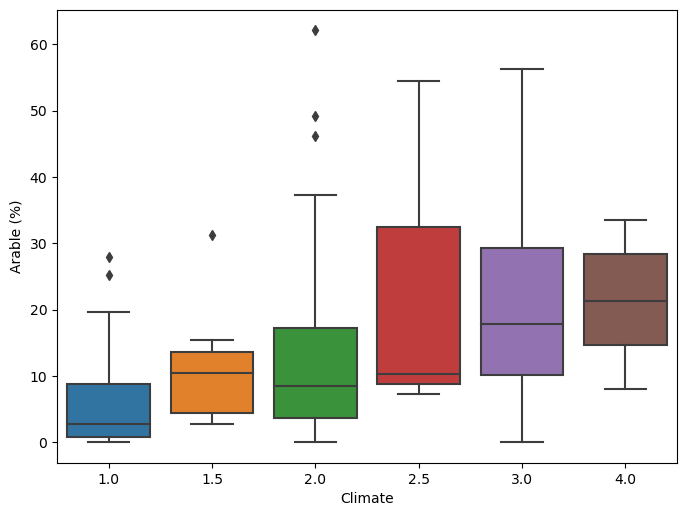

In [9]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df,x='Climate',y='Arable (%)');

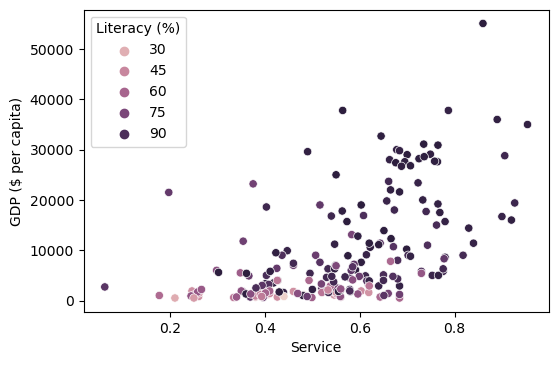

In [10]:
plt.figure(dpi=100)
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Service',hue='Literacy (%)');

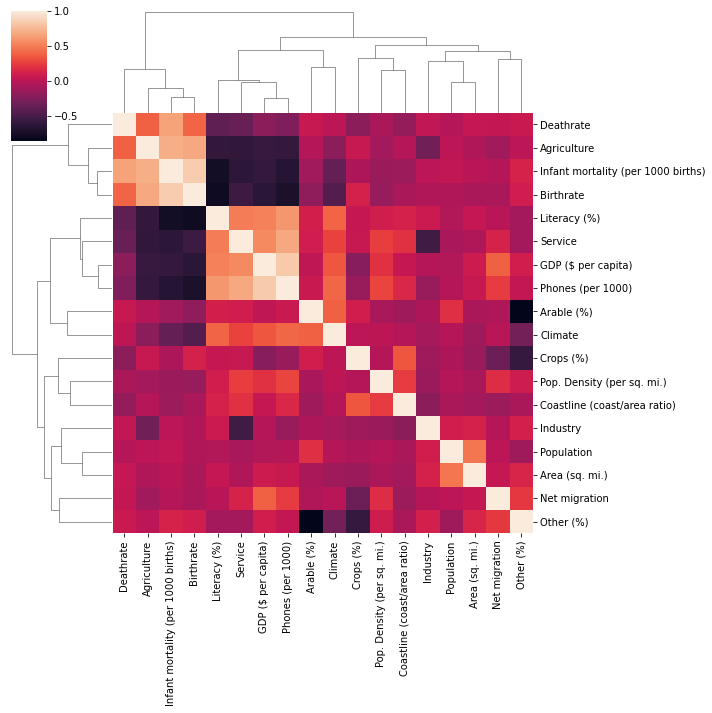

In [11]:
sns.clustermap(df.corr());

## Data Cleaning

In [12]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [13]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [14]:
# since most of these are small islands with extremely small areas we can go ahead and fill in 0 for columns
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [15]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [16]:
#  Filling in the missing Climate values based on the mean climate value for its region.
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [17]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [18]:
#  Filling in the missing Literacy values based on the mean literacy value for its region.
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [19]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [20]:
df = df.dropna()

## Data Preperation

In [21]:
X = df.drop("Country",axis=1)

In [22]:
X = pd.get_dummies(X)

In [23]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
scaled_X = scaler.fit_transform(X)

In [26]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

## Creating & Fitting K-Means Model

In [27]:
from sklearn.cluster import KMeans

In [28]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

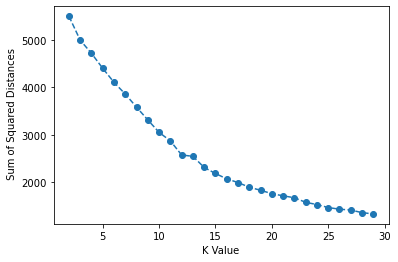

In [29]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<AxesSubplot:>

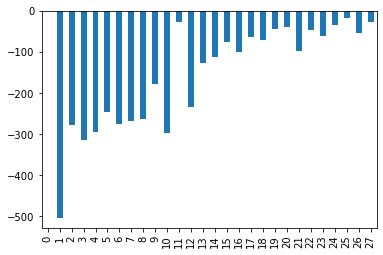

In [30]:
pd.Series(ssd).diff().plot(kind='bar')

In [31]:
#Choosing K=3
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [32]:
model.labels_

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0])

In [33]:
X['K=3 Clusters'] = model.labels_
df['K=3 Clusters'] = model.labels_

In [34]:
X.corr()['K=3 Clusters'].sort_values()

Birthrate                                    -0.810401
Infant mortality (per 1000 births)           -0.785730
Region_SUB-SAHARAN AFRICA                    -0.705376
Agriculture                                  -0.629806
Deathrate                                    -0.442443
Other (%)                                    -0.111105
Industry                                     -0.045155
Crops (%)                                    -0.038410
Region_ASIA (EX. NEAR EAST)                  -0.027141
Region_NEAR EAST                             -0.005265
Region_NORTHERN AFRICA                       -0.003260
Population                                   -0.002288
Area (sq. mi.)                                0.015471
Region_C.W. OF IND. STATES                    0.024027
Region_OCEANIA                                0.039187
Region_LATIN AMER. & CARIB                    0.054741
Coastline (coast/area ratio)                  0.087798
Region_NORTHERN AMERICA                       0.128250
Net migrat

In [35]:
df[df['K=3 Clusters']==0]['Country']

0               Afghanistan
5                    Angola
21                    Benin
23                   Bhutan
26                 Botswana
31             Burkina Faso
32                    Burma
33                  Burundi
34                 Cambodia
35                 Cameroon
39     Central African Rep.
40                     Chad
44                  Comoros
45         Congo, Dem. Rep.
46     Congo, Repub. of the
49            Cote d'Ivoire
55                 Djibouti
62        Equatorial Guinea
63                  Eritrea
65                 Ethiopia
72                    Gabon
73              Gambia, The
77                    Ghana
86                   Guinea
87            Guinea-Bissau
107                   Kenya
113                    Laos
116                 Lesotho
117                 Liberia
124              Madagascar
125                  Malawi
128                    Mali
132              Mauritania
134                 Mayotte
142              Mozambique
143                 

In [36]:
df[df['K=3 Clusters']==1]['Country']

1                Albania
2                Algeria
3         American Samoa
6               Anguilla
7      Antigua & Barbuda
             ...        
220       Virgin Islands
221    Wallis and Futuna
222            West Bank
223       Western Sahara
224                Yemen
Name: Country, Length: 114, dtype: object

In [37]:
df[df['K=3 Clusters']==2]['Country']

4                   Andorra
10                    Aruba
11                Australia
12                  Austria
17                 Barbados
18                  Belarus
19                  Belgium
22                  Bermuda
25     Bosnia & Herzegovina
28       British Virgin Is.
30                 Bulgaria
36                   Canada
38           Cayman Islands
50                  Croatia
53           Czech Republic
54                  Denmark
64                  Estonia
66            Faroe Islands
68                  Finland
69                   France
76                  Germany
78                Gibraltar
79                   Greece
91                Hong Kong
92                  Hungary
93                  Iceland
98                  Ireland
99              Isle of Man
101                   Italy
103                   Japan
104                  Jersey
110            Korea, South
114                  Latvia
119           Liechtenstein
120               Lithuania
121              Lux